## Tutorial 5: Solving SVM with Quadratic Programming

A **quadratic program** ([See qpsolvers documentation](https://qpsolvers.github.io/qpsolvers/quadratic-programming.html)) is defined as standard form as:

$$
\begin{align*}
    \underset{x}{\text{minimize}} \    \frac{1}{2} x^T P x + q^T x \\
    \text{subject to} \   
        G x \leq h                \\
        A x = b                   \\
        lb \leq x \leq ub
\end{align*}
$$

Let's consider the following SVM example discussed in tutorial:

<center>
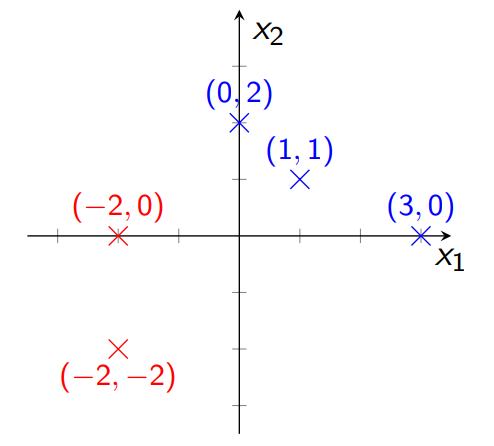<br>
<small>Figure 1: SVM Example</small>
</center>

The primal formulation is given by:

$$
\begin{align*}
    \underset{\boldsymbol{w}}{\text{minimize}} \    \frac{1}{2} \lVert \boldsymbol{w} \rVert^2 \\
    \text{subject to} \   
        y^{(i)} (\boldsymbol{w} \cdot \boldsymbol{x}^{(i)}) \geq 1
\end{align*}
$$

In this example, assuming there is no bias, the formulation becomes:

$$
\begin{align*}
    \underset{w_1, w_2}{\text{minimize}} \    \frac{1}{2} (w_1^2 + w_2^2) \\
    \text{subject to} \   
        2w_1 + 2w_2 \geq 1 \\
        2w_1 \geq 1 \\
        2w_2 \geq 1 \\
        w_1 + w_2 \geq 1 \\
        3w_1 \geq 1 \\
\end{align*}
$$

**Exercise**: Use the `qpsolvers` package to solve the SVM primal problem above. You should turn it into this form:

$$
\begin{align*}
    \underset{x}{\text{minimize}} \    \frac{1}{2} x^T P x + q^T x \\
    \text{subject to} \   
        G x \leq h                \\
        A x = b                   \\
        lb \leq x \leq ub
\end{align*}
$$

In [ ]:
import numpy as np
from qpsolvers import solve_qp

# TODO: Define P, q, and any other matrices you need.
P = np.array([[1]], dtype=np.double)
q = np.array([1], dtype=np.double)

x = solve_qp(P, q, solver="cvxopt")
print(f"QP solution: x = {np.round(x, 2)}")

The dual formulation is given by:

$$
\begin{align*}
    \underset{\boldsymbol{\alpha}}{\text{minimize}} \   \sum_i \alpha^{(i)} - \frac{1}{2} \sum_i \sum_j y^{(i)} y^{(j)} \alpha^{(i)} \alpha^{(j)} (\boldsymbol{x}^{(i)} \cdot \boldsymbol{x}^{(j)}) \\
    \text{subject to} \   \sum_i \alpha^{(i)} y^{(i)} = 0 \text{ and } \alpha^{(i)} \geq 0
\end{align*}
$$

and

$$\boldsymbol{w} = \sum_i \alpha^{(i)} y^{(i)} \boldsymbol{x}^{(i)}$$

In this example, assuming there is no bias, the formulation becomes:

$$
\begin{align*}
    \underset{\boldsymbol{\alpha}}{\text{maximize}} & \    \alpha^{(1)} + \alpha^{(2)} + \alpha^{(3)} + \alpha^{(4)} + \alpha^{(5)} \\
                & \ - \dfrac{1}{2} ( 8(\alpha^{(1)})^2 + 4\alpha^{(1)} \alpha^{(2)} + 4 \alpha^{(1)} \alpha^{(3)} + 4\alpha^{(1)}\alpha^{(4)} + 6\alpha^{(1)}\alpha^{(5)}  \\
                & \ \quad \quad + 4\alpha^{(2)}\alpha^{(1)} + 4(\alpha^{(2)})^2 + 4\alpha^{(2)}\alpha^{(3)} + 2\alpha^{(2)}\alpha^{(5)} \\
                & \ \quad \quad + 4\alpha^{(3)}\alpha^{(1)} + 4(\alpha^{(3)})^2 + 2\alpha^{(3)}\alpha^{(4)} \\
                & \ \quad \quad + 4\alpha^{(4)}\alpha^{(1)} + 2\alpha^{(4)}\alpha^{(2)} + 2\alpha^{(4)}\alpha^{(3)} + 2(\alpha^{(4)})^2 + 3\alpha^{(4)}\alpha^{(5)} \\
                & \ \quad \quad + 6\alpha^{(5)}\alpha^{(1)} + 6\alpha^{(5)}\alpha^{(2)} + 3\alpha^{(5)}\alpha^{(4)} + 9(\alpha^{(5)})^2)\\
    \text{subject to} \   & \ -\alpha^{(1)} - \alpha^{(2)} + \alpha^{(3)} + \alpha^{(4)} + \alpha^{(5)} = 0 \\
    & \ \alpha^{(i)} \geq 0
\end{align*}
$$

**Exercise**: Use the `qpsolvers` package to solve the SVM dual problem above. You should turn it into this form:

$$
\begin{align*}
    \underset{x}{\text{minimize}} \    \frac{1}{2} x^T P x + q^T x \\
    \text{subject to} \   
        G x \leq h                \\
        A x = b                   \\
        lb \leq x \leq ub
\end{align*}
$$

In [ ]:
import numpy as np
from qpsolvers import solve_qp

# Here are the coefficients for y^(i) y^(j) (x^(i) . x^(j))
M = np.array([[8, 4, 4, 4, 6],
              [4, 4, 4, 0, 1],
              [4, 0, 4, 2, 0],
              [4, 2, 2, 2, 3],
              [6, 6, 0, 3, 9]], dtype=np.double)

# TODO: Define P, q, and any other matrices you need.
P = np.array([[1]], dtype=np.double)
q = np.array([1], dtype=np.double)

x = solve_qp(P, q, solver="cvxopt")
print(f"QP solution: x = {np.round(x, 2)}")